# Install Dependencies

In [1]:
%pip install tensorflow tensorflow-io matplotlib librosa pandas

Note: you may need to restart the kernel to use updated packages.


# Load Dependencies

In [1]:
import os
import tensorflow as tf
import tensorflow_io as tfio
import librosa
import soundfile
from matplotlib import pyplot as plt
import numpy as np

In [13]:
def trim_audio(input_path, output_path, chunk_size):
  if not os.path.exists(output_path):
    os.makedirs(output_path)
    
  audio, sr = librosa.load(input_path)
  num_chunks = int(len(audio) / (sr * chunk_size))
  trimmed_audio_paths = []
  start_sample = 0
  end_sample = sr * chunk_size
  trimmed_audio = audio[start_sample:end_sample]
  output_filename = f"{os.path.splitext(os.path.basename(input_path))[0]}_trimmed.wav"
  output_file_path = os.path.join(output_path, output_filename)
  soundfile.write(output_file_path, trimmed_audio, sr)
  trimmed_audio_paths.append(output_file_path)

  print(f"Trimmed file saved as: {output_file_path}")

  return trimmed_audio_paths

In [14]:
def trim_dataset(input_folder, output_folder, chunk_duration):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    trimmed_audio_paths = []
    for filename in os.listdir(input_folder):
        if filename.endswith(".wav"):
            input_file_path = os.path.join(input_folder, filename)
            trimmed_files = trim_audio(input_file_path, output_folder, chunk_duration)
            trimmed_audio_paths.extend(trimmed_files)

    return trimmed_audio_paths

In [16]:
input_path = r'C:\Users\user\Documents\Notebooks\DeepFakeDetection\KAGGLE\AUDIO\Fake'
output_path = r'C:\Users\user\Documents\Notebooks\DeepFakeDetection\KAGGLE\AUDIO\trimmed_Fake'
chunk_size = 60

trimmed_files = trim_dataset(input_path, output_path, chunk_size)
print("Trimming complete. Trimmed audio files saved in:", output_path)

Trimmed file saved as: C:\Users\user\Documents\Notebooks\DeepFakeDetection\KAGGLE\AUDIO\trimmed_Fake\biden-to-linus_trimmed.wav


Trimmed file saved as: C:\Users\user\Documents\Notebooks\DeepFakeDetection\KAGGLE\AUDIO\trimmed_Fake\biden-to-margot_trimmed.wav
Trimmed file saved as: C:\Users\user\Documents\Notebooks\DeepFakeDetection\KAGGLE\AUDIO\trimmed_Fake\biden-to-musk_trimmed.wav
Trimmed file saved as: C:\Users\user\Documents\Notebooks\DeepFakeDetection\KAGGLE\AUDIO\trimmed_Fake\biden-to-Obama_trimmed.wav
Trimmed file saved as: C:\Users\user\Documents\Notebooks\DeepFakeDetection\KAGGLE\AUDIO\trimmed_Fake\biden-to-ryan_trimmed.wav
Trimmed file saved as: C:\Users\user\Documents\Notebooks\DeepFakeDetection\KAGGLE\AUDIO\trimmed_Fake\biden-to-taylor_trimmed.wav
Trimmed file saved as: C:\Users\user\Documents\Notebooks\DeepFakeDetection\KAGGLE\AUDIO\trimmed_Fake\biden-to-Trump_trimmed.wav
Trimmed file saved as: C:\Users\user\Documents\Notebooks\DeepFakeDetection\KAGGLE\AUDIO\trimmed_Fake\linus-to-biden_trimmed.wav
Trimmed file saved as: C:\Users\user\Documents\Notebooks\DeepFakeDetection\KAGGLE\AUDIO\trimmed_Fake\lin

In [36]:
data_dir = r'C:\Users\user\Documents\Notebooks\DeepFakeDetection\KAGGLE\AUDIO\Trimmed Audio'

In [37]:
os.listdir(data_dir)

['trimmed_Fake', 'trimmed_Real']

# Data Preparation

In [2]:
def load_wav_16k_mono(audio_file):
    audio_tensor = tf.io.read_file(audio_file)
    audio_tensor = tf.audio.decode_wav(audio_tensor, desired_channels=1, desired_samples=16000).audio
    audio_tensor = tf.squeeze(audio_tensor, axis=-1)
    audio_tensor = tf.cast(audio_tensor, tf.float32)
    return audio_tensor

In [3]:
audio_tensor = load_wav_16k_mono(r'C:\Users\user\Documents\Notebooks\DeepFakeDetection\KAGGLE\AUDIO\Trimmed Audio\trimmed_Fake\biden-to-linus_trimmed.wav')

In [4]:
audio_tensor

<tf.Tensor: shape=(16000,), dtype=float32, numpy=
array([ 0.00790405,  0.01165771,  0.006073  , ..., -0.04058838,
        0.01324463,  0.06369019], dtype=float32)>

In [5]:
def generate_spectrogram(audio_tensor, sample_rate=16000):
    spectrogram = tf.signal.stft(audio_tensor, frame_length=256, frame_step=128)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=-1)
    return spectrogram

In [6]:
def process_audio_files(input_folder, label):
    data = []
    for filename in os.listdir(input_folder):
        if filename.endswith(".wav"):
            input_file_path = os.path.join(input_folder, filename)
            print(f"Processing file: {input_file_path}")
            audio_tensor = load_wav_16k_mono(input_file_path)
            spectrogram = generate_spectrogram(audio_tensor)
            data.append((spectrogram, label))
    
    return data

In [7]:
def plot_spectrogram(spectrogram, label):
    spectrogram = np.array(spectrogram) 
    num_spectrograms = spectrogram.shape[0]
    fig, axs = plt.subplots(nrows=num_spectrograms, figsize=(20, 10))
    if num_spectrograms == 1:
        axs = [axs] 
    for i in range(num_spectrograms):
        axs[i].imshow(spectrogram[i].squeeze(), aspect='auto', cmap='viridis')
        axs[i].set_title(f'Label: {label[i]}')
        axs[i].set_xlabel('Time')
        axs[i].set_ylabel('Frequency')
        axs[i].grid(False)
        axs[i].axis('on')
    plt.tight_layout()
    plt.show()

In [8]:
Real = os.path.abspath(r'C:\Users\user\Documents\Notebooks\DeepFakeDetection\KAGGLE\AUDIO\Trimmed Audio\trimmed_Real')
Fake = os.path.abspath(r'C:\Users\user\Documents\Notebooks\DeepFakeDetection\KAGGLE\AUDIO\Trimmed Audio\trimmed_Fake')
fake_data = process_audio_files(Fake, label=0)
real_data = process_audio_files(Real, label=1)

Processing file: C:\Users\user\Documents\Notebooks\DeepFakeDetection\KAGGLE\AUDIO\Trimmed Audio\trimmed_Fake\biden-to-linus_trimmed.wav
Processing file: C:\Users\user\Documents\Notebooks\DeepFakeDetection\KAGGLE\AUDIO\Trimmed Audio\trimmed_Fake\biden-to-margot_trimmed.wav
Processing file: C:\Users\user\Documents\Notebooks\DeepFakeDetection\KAGGLE\AUDIO\Trimmed Audio\trimmed_Fake\biden-to-musk_trimmed.wav
Processing file: C:\Users\user\Documents\Notebooks\DeepFakeDetection\KAGGLE\AUDIO\Trimmed Audio\trimmed_Fake\biden-to-Obama_trimmed.wav
Processing file: C:\Users\user\Documents\Notebooks\DeepFakeDetection\KAGGLE\AUDIO\Trimmed Audio\trimmed_Fake\biden-to-ryan_trimmed.wav
Processing file: C:\Users\user\Documents\Notebooks\DeepFakeDetection\KAGGLE\AUDIO\Trimmed Audio\trimmed_Fake\biden-to-taylor_trimmed.wav
Processing file: C:\Users\user\Documents\Notebooks\DeepFakeDetection\KAGGLE\AUDIO\Trimmed Audio\trimmed_Fake\biden-to-Trump_trimmed.wav
Processing file: C:\Users\user\Documents\Noteboo

In [9]:
labels = [label for _, label in real_data]
print(labels)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


# Loading Dataset into Keras

In [10]:
len(fake_data), len(real_data)

(56, 44)

In [11]:
all_data = fake_data + real_data
spectrograms = [data[0] for data in all_data]
labels = [data[1] for data in all_data]

In [12]:
labels = [label for _, label in all_data]
print(labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [13]:
len(all_data)

100

In [14]:
len(spectrograms)

100

In [15]:
dataset = tf.data.Dataset.from_tensor_slices((spectrograms, labels))

In [16]:
dataset = dataset.shuffle(buffer_size=len(all_data)).batch(batch_size=4).prefetch(buffer_size=tf.data.AUTOTUNE)

In [17]:
len(dataset)

25

In [18]:
data_iterator = dataset.as_numpy_iterator()

In [19]:
batch = data_iterator.next()

In [20]:
spectrogram, label = batch
print(label)

[1 0 0 0]


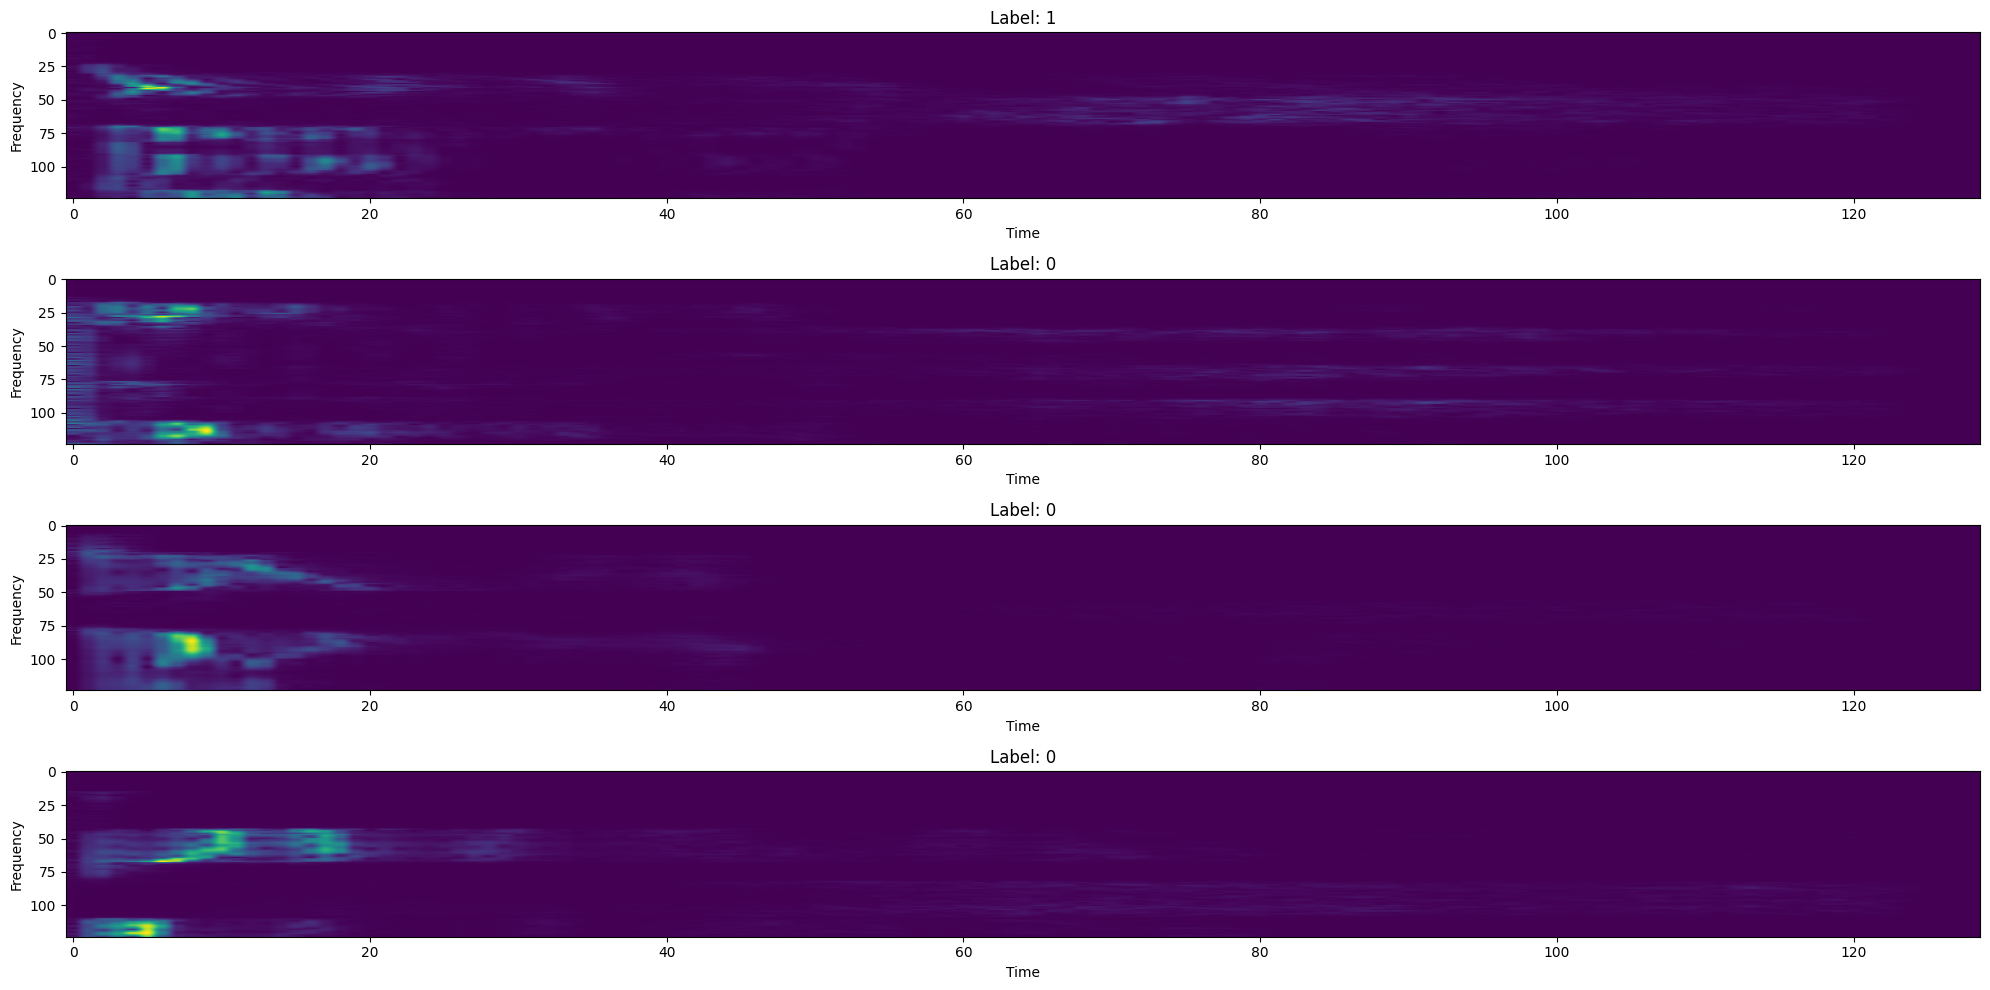

In [21]:
spectrogram, label = batch
plot_spectrogram(spectrogram, label)

In [22]:
train_size = int(len(dataset)*.7)
val_size = int(len(dataset)*.2)
test_size = int(len(dataset)*.1)

In [23]:
train_size

17

In [24]:
train = dataset.take(train_size)
val = dataset.skip(train_size).take(val_size)
test = dataset.skip(train_size + val_size).take(test_size)

In [25]:
len(test)

2

In [26]:
spectrogram, label = train.as_numpy_iterator().next()
spectrogram.shape

(4, 124, 129, 1)

# Deep Learning Model

In [27]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D
from keras.callbacks import EarlyStopping

In [28]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(124,129,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation ='sigmoid'))

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [30]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 122, 127, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 122, 127, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 61, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 59, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 59, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 29, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 27, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 27, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 23296)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,982,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,083,905 (11.76 MB)

 Trainable params: 3,083,457 (11.76 MB)

 Non-trainable params: 448 (1.75 KB)

**Model Training**

In [31]:
logdir = 'logs'

In [32]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [33]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=5,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=0,
)

In [44]:
history = model.fit(train, epochs = 100, validation_data = val, callbacks = [tensorboard_callback, callback])

Epoch 1/100


17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 132ms/step - accuracy: 0.7473 - loss: 1.0148 - val_accuracy: 0.9000 - val_loss: 0.4056
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 133ms/step - accuracy: 0.8416 - loss: 0.7641 - val_accuracy: 0.9500 - val_loss: 0.2039
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 146ms/step - accuracy: 0.8043 - loss: 1.3247 - val_accuracy: 0.8000 - val_loss: 0.4058
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 132ms/step - accuracy: 0.8590 - loss: 0.7319 - val_accuracy: 0.8000 - val_loss: 0.2903
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 132ms/step - accuracy: 0.7674 - loss: 0.8165 - val_accuracy: 0.7000 - val_loss: 1.0937
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 147ms/step - accuracy: 0.7621 - loss: 1.2330 - val_accuracy: 0.7500 - val_loss: 0.7398
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 138ms/step - accuracy: 0.8767 - loss: 0.4068 - val_accuracy: 0.6500 - val_loss: 0.9139


# Model Performance

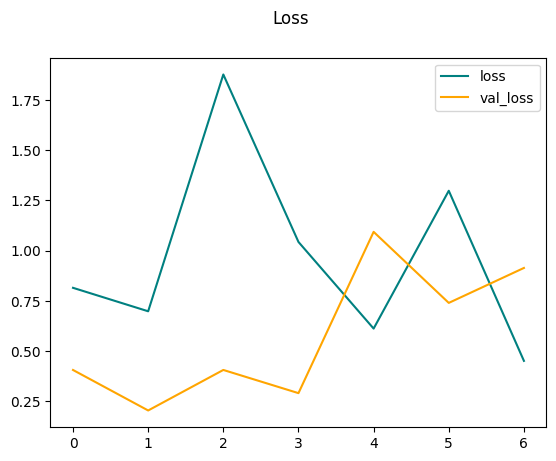

In [45]:
fig = plt.figure()
plt.plot(history.history['loss'], color = 'teal', label = 'loss')
plt.plot(history.history['val_loss'], color = 'orange', label = 'val_loss')
fig.suptitle('Loss')
plt.legend(loc = "upper right")
plt.show()

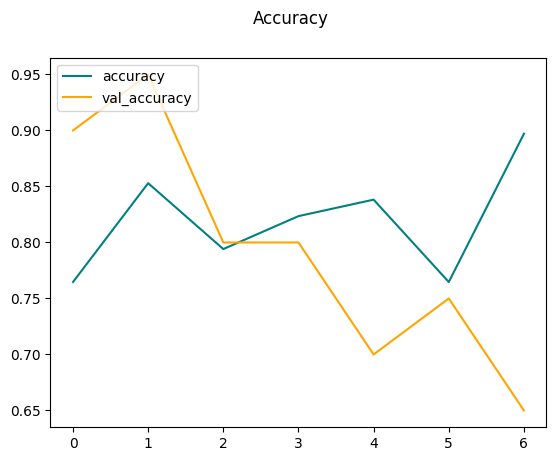

In [46]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color = 'teal', label = 'accuracy')
plt.plot(history.history['val_accuracy'], color = 'orange', label = 'val_accuracy')
fig.suptitle('Accuracy')
plt.legend(loc = "upper left")
plt.show()

# Evaluate Performance

In [47]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [48]:
pre = Precision()
rec = Recall()
acc = BinaryAccuracy()

In [49]:
for batch in test.as_numpy_iterator():
    x, y = batch
    yhat = model.predict(x)
    pre.update_state(y, yhat)
    rec.update_state(y, yhat)
    acc.update_state(y, yhat)

print(f'Precision:{pre.result().numpy()}, Recall:{rec.result().numpy()}, Accuracy:{acc.result().numpy()}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Precision:0.6666666865348816, Recall:1.0, Accuracy:0.75


In [50]:
from tensorflow.keras.models import load_model
model.save(os.path.join(r'C:\Users\user\Documents\Notebooks\DeepFakeDetection', 'DFDM-M1.keras'))

# Data Augmentation

In [51]:
def calculate_target_frames(spectrogram):
    num_frames = tf.shape(spectrogram)[1]
    stretch_factor = tf.random.uniform(shape=[], minval=0.9, maxval=1.1, dtype=tf.float32)
    target_num_frames = tf.cast(tf.cast(num_frames, tf.float32) * stretch_factor, tf.int32)
    return target_num_frames

In [52]:
def resize_spectrogram(spectrogram, target_num_frames):
    return tf.cond(
        tf.greater(target_num_frames, 0),
        lambda: tf.image.resize(spectrogram, size=[target_num_frames, tf.shape(spectrogram)[2]]),
        lambda: spectrogram
    )

In [53]:
def augment_spectrogram(spectrogram, label):
    spectrogram = tf.convert_to_tensor(spectrogram, dtype=tf.float32)

    if tf.random.uniform([]) < 0.5:
        max_shift = tf.shape(spectrogram)[1]
        shift = tf.random.uniform(shape=[], minval=-max_shift // 10, maxval=max_shift // 10, dtype=tf.int32)
        spectrogram = tf.roll(spectrogram, shift=shift, axis=1)
    
    if tf.random.uniform([]) < 0.5:
        num_bins = tf.shape(spectrogram)[2]
        bins_per_semitone = tf.cast(num_bins / 24, tf.float32)
        semitone_shift = tf.random.uniform(shape=[], minval=-1.0, maxval=1.0, dtype=tf.float32)
        pitch_shift_bins = tf.cast(semitone_shift * bins_per_semitone, tf.int32)
        spectrogram = tf.roll(spectrogram, shift=pitch_shift_bins, axis=2)
    
    if tf.random.uniform([]) < 0.5:
        target_num_frames = calculate_target_frames(spectrogram)
        spectrogram = resize_spectrogram(spectrogram, target_num_frames)
    
    if tf.random.uniform([]) < 0.5:
        noise_factor = 0.002
        noise = tf.random.normal(tf.shape(spectrogram), stddev=noise_factor)
        spectrogram = spectrogram + noise
    
    if tf.random.uniform([]) < 0.5:
        scale_factor = tf.random.uniform(shape=[], minval=0.8, maxval=1.2, dtype=tf.float32)
        spectrogram = spectrogram * scale_factor
    
    return spectrogram, label

In [54]:
train = train.map(augment_spectrogram, num_parallel_calls=tf.data.AUTOTUNE)
val = val.map(augment_spectrogram, num_parallel_calls=tf.data.AUTOTUNE)

In [55]:
train

<_ParallelMapDataset element_spec=(TensorSpec(shape=(None, None, None, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

# Updated Model

In [56]:
model = Sequential()

model.add(Conv2D(16, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(124,129,1), data_format="channels_last"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(GlobalAveragePooling2D())

model.add(Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

In [57]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [58]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 122, 127, 16)   │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 122, 127, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 61, 63, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 59, 61, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 59, 61, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 29, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 27, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 27, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 13, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,017 (117.25 KB)

 Trainable params: 29,793 (116.38 KB)

 Non-trainable params: 224 (896.00 B)

In [71]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(train, validation_data=val, epochs=100, callbacks=[early_stopping])

Epoch 1/100


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.7231 - loss: 0.6557 - val_accuracy: 0.9000 - val_loss: 0.4839
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.8572 - loss: 0.3978 - val_accuracy: 0.6000 - val_loss: 0.6235
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.9365 - loss: 0.3166 - val_accuracy: 0.6500 - val_loss: 0.5564
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.7946 - loss: 0.4098 - val_accuracy: 0.6000 - val_loss: 1.2966
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.8515 - loss: 0.4034 - val_accuracy: 0.4500 - val_loss: 1.9012
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.8713 - loss: 0.4019 - val_accuracy: 0.6500 - val_loss: 1.0170
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.8532 - loss: 0.4382 - val_accuracy: 0.6000 - val_loss: 1.5331
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.8446 - loss: 0.5199 - val_accuracy: 0.6000 - val_l

# Model Performance

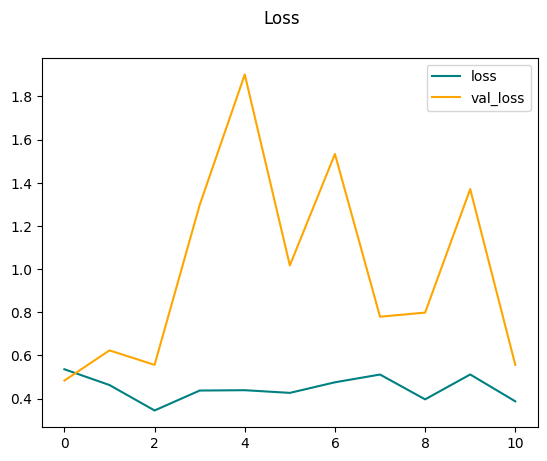

In [72]:
fig = plt.figure()
plt.plot(history.history['loss'], color = 'teal', label = 'loss')
plt.plot(history.history['val_loss'], color = 'orange', label = 'val_loss')
fig.suptitle('Loss')
plt.legend(loc = "upper right")
plt.show()

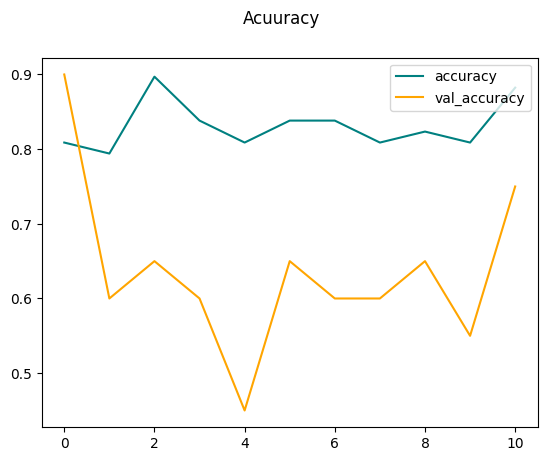

In [73]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color = 'teal', label = 'accuracy')
plt.plot(history.history['val_accuracy'], color = 'orange', label = 'val_accuracy')
fig.suptitle('Acuuracy')
plt.legend(loc = "upper right")
plt.show()

# Evaluate Performance

In [74]:
for batch in test.as_numpy_iterator():
    x, y = batch
    yhat = model.predict(x)
    pre.update_state(y, yhat)
    rec.update_state(y, yhat)
    acc.update_state(y, yhat)

print(f'Precision:{pre.result().numpy()}, Recall:{rec.result().numpy()}, Accuracy:{acc.result().numpy()}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Precision:0.6315789222717285, Recall:1.0, Accuracy:0.78125


In [75]:
from tensorflow.keras.models import load_model
model.save(os.path.join(r'C:\Users\user\Documents\Notebooks\DeepFakeDetection', 'DFDM-M2.keras'))

# Gray Scale to RGB

In [76]:
def preprocess_images(spectrogram, label):
    image = tf.image.resize(spectrogram, (124, 129))
    image = tf.image.grayscale_to_rgb(image) 
    return image, label

In [77]:
train_rgb = train.map(preprocess_images)
val_rgb = val.map(preprocess_images)

# Pre-Trained Model RESNET50

In [78]:
from keras.applications import ResNet50

base_model = ResNet50(include_top=False, weights='imagenet', input_shape=(124, 129, 3))

model = Sequential()
model.add(base_model)

model.add(GlobalAveragePooling2D())

model.add(Dense(1024, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [79]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [80]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ ?                      │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ ?                      │   0 (unbuilt) │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [81]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(train_rgb, validation_data=val_rgb, epochs=100, callbacks=[early_stopping])

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.5772 - loss: 2.6792 - val_accuracy: 0.5500 - val_loss: 45779.3828
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.5811 - loss: 2.7030 - val_accuracy: 0.5000 - val_loss: 11277.9863
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.5296 - loss: 3.3311 - val_accuracy: 0.6500 - val_loss: 32380.9121
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.5344 - loss: 2.3018 - val_accuracy: 0.5500 - val_loss: 1540.2832
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.5911 - loss: 1.7029 - val_accuracy: 0.6500 - val_loss: 5.2266
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.5336 - loss: 1.5957 - val_accuracy: 0.4500 - val_loss: 1.4515
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.7293 - loss: 1.3489 - val_accuracy: 0.4000 - val_loss: 1.4101
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.5970 - loss: 1.4580 - val_accur

# Model Performance

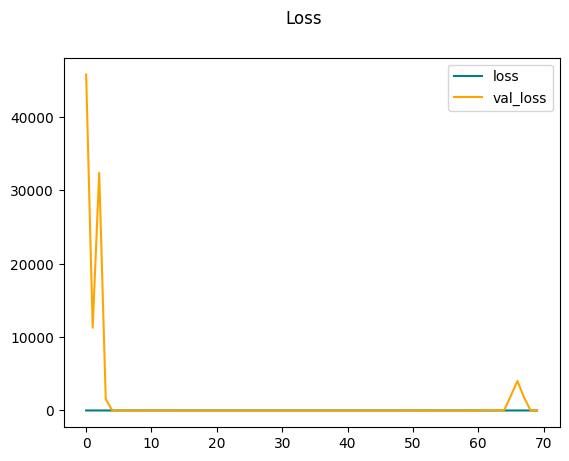

In [82]:
fig = plt.figure()
plt.plot(history.history['loss'], color = 'teal', label = 'loss')
plt.plot(history.history['val_loss'], color = 'orange', label = 'val_loss')
fig.suptitle('Loss')
plt.legend(loc = "upper right")
plt.show()

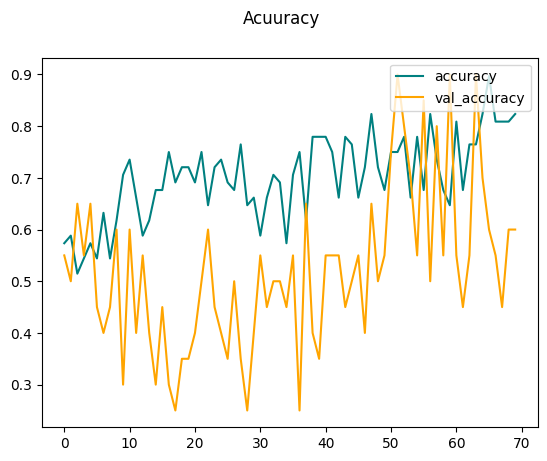

In [83]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color = 'teal', label = 'accuracy')
plt.plot(history.history['val_accuracy'], color = 'orange', label = 'val_accuracy')
fig.suptitle('Acuuracy')
plt.legend(loc = "upper right")
plt.show()

# Model Evaluation

In [85]:
test_rgb = test.map(preprocess_images)
for batch in test_rgb.as_numpy_iterator():
    x, y = batch
    yhat = model.predict(x)
    pre.update_state(y, yhat)
    rec.update_state(y, yhat)
    acc.update_state(y, yhat)

print(f'Precision:{pre.result().numpy()}, Recall:{rec.result().numpy()}, Accuracy:{acc.result().numpy()}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
Precision:0.6666666865348816, Recall:1.0, Accuracy:0.7749999761581421


In [86]:
from tensorflow.keras.models import load_model
model.save(os.path.join(r'C:\Users\user\Documents\Notebooks\DeepFakeDetection', 'DFDM-M3.keras'))